In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('Salary_dataset.csv',usecols=['YearsExperience','Salary'])

In [37]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<Axes: xlabel='YearsExperience', ylabel='Density'>

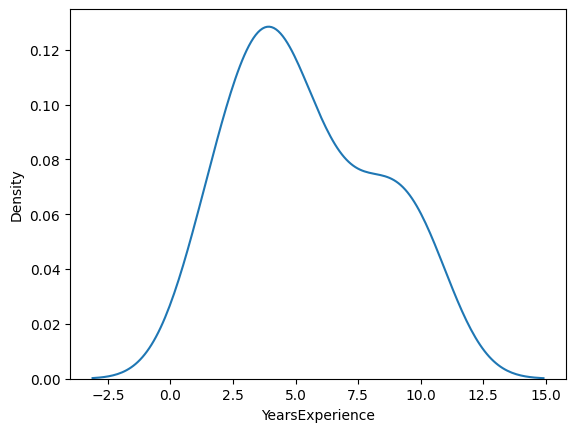

In [39]:
sns.kdeplot(df['YearsExperience'])

<Axes: xlabel='Salary', ylabel='Density'>

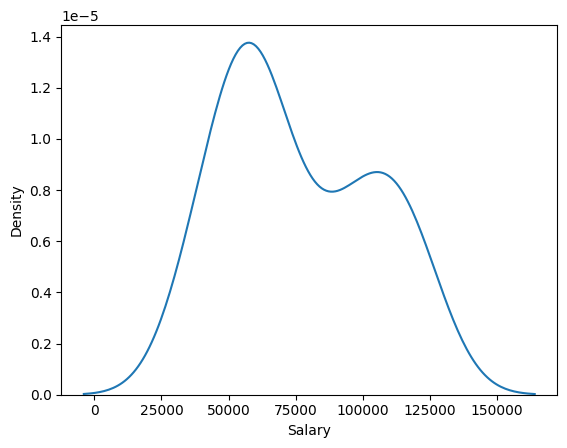

In [40]:
sns.kdeplot(df['Salary'])

<Axes: >

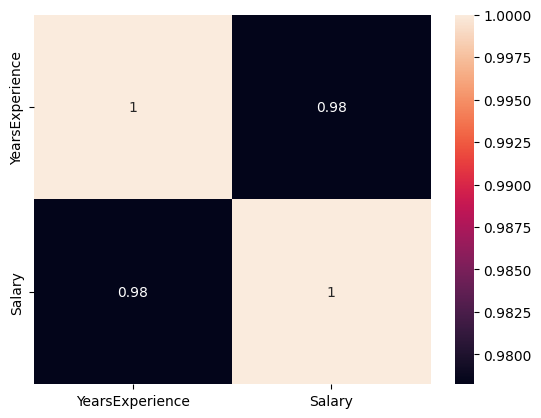

In [41]:
sns.heatmap(data=df.corr(),annot=True)

In [42]:
df.shape

(30, 2)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

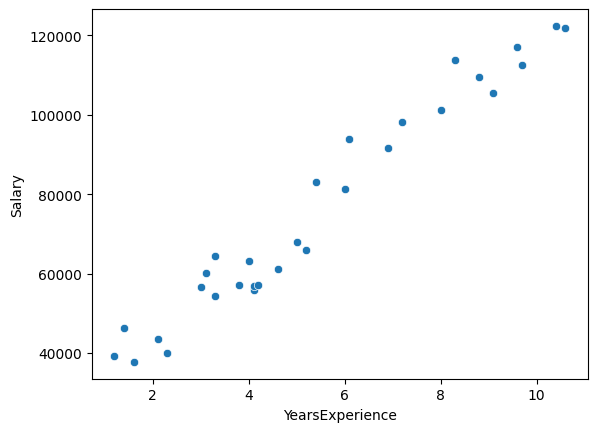

In [43]:
sns.scatterplot(data=df,x='YearsExperience',y='Salary')

In [44]:
X = df[['YearsExperience']]
y = df['Salary']

In [45]:
from sklearn.svm import SVR

In [46]:
from sklearn.model_selection import GridSearchCV

svr = SVR()

# Define the grid of hyperparameters to search
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Perform GridSearchCV
grid_search = GridSearchCV(svr, param_grid, cv=5)
grid_search.fit(X, y)

# Print the best hyperparameters found
print("Best hyperparameters: ", grid_search.best_params_)



Best hyperparameters:  {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}


In [49]:
svr = SVR(C=10,gamma=0.1,kernel='linear')
svr.fit(X,y)

SVR(C=10, gamma=0.1, kernel='linear')

In [50]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

prediction = svr.predict(X)
print("MAE",mean_absolute_error(y,prediction))
print("MSE",mean_squared_error(y,prediction))
print("RMSE",np.sqrt(mean_squared_error(y,prediction)))
print("R2 Score",r2_score(y,prediction))
r2 = r2_score(y,prediction)

MAE 21445.186666666665
MSE 726033708.1967243
RMSE 26945.01267761298
R2 Score 0.0006408176320761294


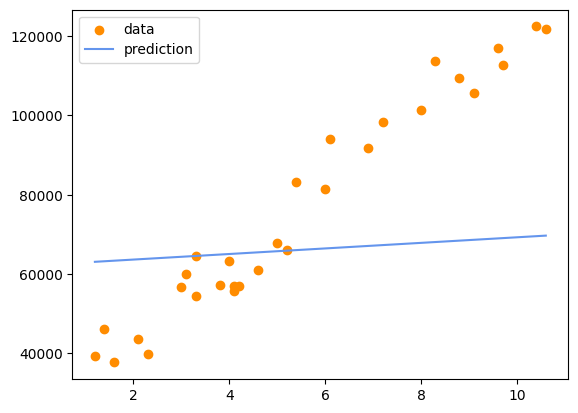

In [55]:
# plot the predicted values against the true values 
prediction = svr.predict(X)
plt.scatter(X, y, color='darkorange', 
            label='data') 
plt.plot(X, prediction, color='cornflowerblue', 
         label='prediction') 
plt.legend() 
plt.show() 